In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/data.csv')
millenial_df = df[(df['year'] >= 2010) & (df['year'] <= 2021)].sort_values(by='danceability')
dance_asc = millenial_df[(millenial_df['danceability'] >= .7) & (df['danceability'] < 1)]
dance_asc

/home/atlas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
17972,0.036900,"['Jeremih', '50 Cent']",0.700,228453,0.598,0,0x3TibRgnSqzkcwrqBd4iX,0.000000,2,0.1110,-7.783,1,Down On Me,70,2010-01-01,0.1140,160.041,0.5940,2010
18504,0.219000,"['Big Sean', 'Lil Wayne', 'Jhené Aiko']",0.700,235187,0.554,1,6bxUnsSGZCmoHHU5auwtps,0.000001,1,0.4190,-5.909,1,Beware,71,2013-01-01,0.1870,97.127,0.0633,2013
172032,0.001960,['L.B.G.'],0.700,194240,0.913,0,44W8eiQmIsUencJYnQAZvb,0.000041,5,0.0667,-5.120,0,Good As My Love - Single Edit,0,2013-03-22,0.0501,129.972,0.8730,2013
17811,0.055100,['Noisecontrollers'],0.700,368000,0.917,0,4qjUVWM2BgIIpVtoF9uhp5,0.024800,5,0.1180,-5.678,0,CTRL.ALT.DELETE (In Qontrol Anthem 2009),19,2020-02-03,0.0986,150.011,0.3860,2020
92704,0.010500,"['SMO', 'Alexander King']",0.700,214467,0.647,0,4fkUsaC0dJfHp5N1kIrZlr,0.000000,2,0.2510,-6.497,1,Workin' (feat. Alexander King),57,2014-06-03,0.0483,86.013,0.2420,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,0.002970,['Tone-Loc'],0.985,249464,0.914,0,2ui62KKhQgwsUF8afLpyXZ,0.000188,0,0.0408,-7.788,1,Funky Cold Medina - Re-Recorded,7,2010-12-21,0.1520,117.003,0.8050,2010
171536,0.022500,"['Dan McKie', 'Zigmund Slezak']",0.985,420000,0.725,0,0SjbmPZN8qUax64tIGod3G,0.307000,0,0.0687,-3.680,1,Dddance - Zigmund Slezak Remix,0,2013-01-07,0.2300,128.016,0.5910,2013
92739,0.124000,['Nilla Pizzi'],0.985,211620,0.522,0,2ppnJ8Wz2US6hbHGX61zy4,0.902000,8,0.1320,-10.259,1,O mama mama - Remix 2014,0,2014-11-27,0.2860,125.006,0.6910,2014
141441,0.145000,"['Pitbull', 'Trina', 'Young Bo']",0.986,229669,0.597,1,1MgM0WDaoQ2A3bnIQTR6ty,0.000002,8,0.1970,-6.809,1,Go Girl,52,2012-05-08,0.3080,115.004,0.7610,2012


In [4]:
big_dance = dance_asc[dance_asc['danceability'] >= .85]
big_dance

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
173749,0.117000,['Drake'],0.850,157605,0.473,1,41a7dZcq30Ss5kPMayWRV0,0.010300,10,0.1080,-5.747,0,That’s How You Feel,64,2018-06-29,0.2090,85.454,0.380,2018
158297,0.313000,['Nicki Minaj'],0.850,279867,0.787,1,6Poyf51k7W3NKnsGwAI90B,0.000000,8,0.1940,-4.134,0,Barbie Dreams,65,2018-08-10,0.3380,87.983,0.700,2018
38528,0.119000,"['Gucci Mane', 'Drake']",0.850,190312,0.405,1,5tFep7dXGd7vEJ668wTPux,0.000118,7,0.0707,-7.509,0,Both (feat. Drake),68,2016-12-16,0.2250,139.976,0.344,2016
142539,0.013900,"['Bad Bunny', 'Diplo', 'Nitti Gritti']",0.850,170509,0.500,1,5jGUJXnELDaDTgiRjD9lsg,0.000384,8,0.0947,-6.708,1,200 Mph,69,2018-12-23,0.0665,160.020,0.816,2018
125866,0.003730,['Nathan Palm'],0.850,344867,0.589,0,3RhheLTvNo5fHW6WjH1UeF,0.727000,0,0.0537,-8.548,1,Yearning - Original Mix,0,2016-12-30,0.1160,119.987,0.541,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,0.002970,['Tone-Loc'],0.985,249464,0.914,0,2ui62KKhQgwsUF8afLpyXZ,0.000188,0,0.0408,-7.788,1,Funky Cold Medina - Re-Recorded,7,2010-12-21,0.1520,117.003,0.805,2010
171536,0.022500,"['Dan McKie', 'Zigmund Slezak']",0.985,420000,0.725,0,0SjbmPZN8qUax64tIGod3G,0.307000,0,0.0687,-3.680,1,Dddance - Zigmund Slezak Remix,0,2013-01-07,0.2300,128.016,0.591,2013
92739,0.124000,['Nilla Pizzi'],0.985,211620,0.522,0,2ppnJ8Wz2US6hbHGX61zy4,0.902000,8,0.1320,-10.259,1,O mama mama - Remix 2014,0,2014-11-27,0.2860,125.006,0.691,2014
141441,0.145000,"['Pitbull', 'Trina', 'Young Bo']",0.986,229669,0.597,1,1MgM0WDaoQ2A3bnIQTR6ty,0.000002,8,0.1970,-6.809,1,Go Girl,52,2012-05-08,0.3080,115.004,0.761,2012


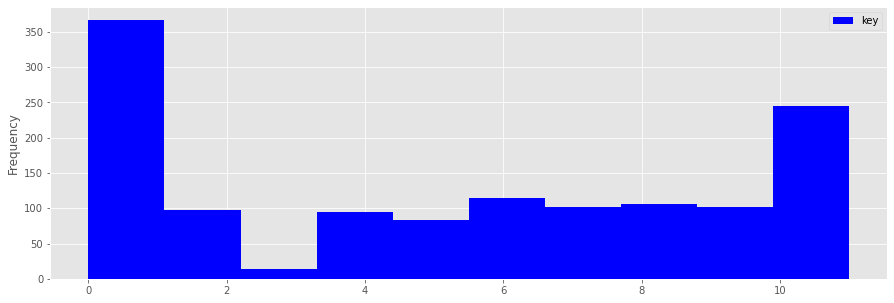

In [39]:
big_dance.plot(kind='hist',x='danceability',y='key',color='blue',figsize=(15,5))
plt.show()

In [8]:
millenial_df_2 = df[(df['year'] >= 2010) & (df['year'] < 2021)]
millenial_df_2

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
107274,0.235000,['Craig Wood'],0.225,167838,0.490,0,4olCxkjG3siJ2uHw7B7rv1,0.000000,9,0.1110,-7.567,0,Your Faithfulness Is A Shield,0,2014-02-28,0.0309,144.113,0.408,2014
109615,0.974000,"['Todd Glass', 'Blake Wexler']",0.747,92212,0.413,1,6S5Rv0TUpSt7q6bxhiVDEh,0.000004,4,0.2930,-14.394,0,Todd Meets Oprah (2016),0,2018-01-12,0.9510,66.081,0.493,2018
109617,0.944000,"['Todd Glass', 'Blake Wexler']",0.699,247092,0.542,1,6jxK8mtnY4lDIZjAixuY1w,0.000000,2,0.5720,-14.644,1,Jay Leno's Cars (2016),0,2018-01-12,0.9260,105.614,0.126,2018
109619,0.000155,"['Chill Out 2016', 'Cool Chillout Zone', 'Chil...",0.770,225884,0.587,0,5RR7SPWtH8myiNnNS6YYsZ,0.866000,2,0.1150,-11.795,1,New Year Eve 2019,0,2020-01-11,0.0425,111.000,0.199,2020
109623,0.000204,['Rob Soundline'],0.742,268800,0.679,0,08ch19ZFjuHr6NLieqhLKl,0.291000,8,0.5730,-5.362,1,2016-05-09 - Fever mix,0,2016-10-03,0.3030,175.047,0.235,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19872,0.213000,['The Kid LAROI'],0.662,161385,0.413,1,27OeeYzk6klgBh83TSvGMA,0.000000,0,0.1340,-7.357,1,WITHOUT YOU,94,2020-11-06,0.0299,93.005,0.467,2020
19976,0.212000,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.838,2020
19886,0.401000,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.145,2020
19866,0.468000,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.682,2020


In [78]:
popularity_asc = millenial_df_2[(millenial_df_2['popularity'] >= 30) & (millenial_df_2['popularity'] < 100)].sort_values(by="popularity")
popularity_asc.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
19787,0.5940,['015B'],0.737,274895,0.441,0,0akJrvpj9aedCNZQYMhZkp,0.0,6,0.0976,-5.230,1,#tb 과거의 오늘 - Remastered,30,2020-02-27,0.0318,97.531,0.256,2020
76417,0.0170,['Armin van Buuren'],0.430,37500,0.957,0,4AsrO3mmLgLKB1ivw9bEXM,0.0,8,0.4170,-5.984,1,A State Of Trance (ASOT 997) - Outro,30,2020-12-31,0.3100,159.021,0.356,2020
18309,0.0236,['Armin van Buuren'],0.542,33800,0.794,0,7Kh32CyazzTdVEBXjKINVO,0.0,7,0.1480,-6.413,1,A State Of Trance (ASOT 996) - Tune Of The Yea...,30,2020-12-24,0.3030,143.377,0.810,2020
17709,0.0236,['Armin van Buuren'],0.542,33800,0.794,0,7Kh32CyazzTdVEBXjKINVO,0.0,7,0.1480,-6.413,1,A State Of Trance (ASOT 996) - Tune Of The Yea...,30,2020-12-24,0.3030,143.377,0.810,2020
18329,0.1530,['Armin van Buuren'],0.597,32250,0.786,0,0hxNCO70HfA25Vi3fv7J7f,0.0,1,0.3840,-7.280,1,A State Of Trance (ASOT 994) - ASOT Tune Of Th...,30,2020-12-10,0.3540,83.683,0.599,2020


<AxesSubplot:ylabel='Frequency'>

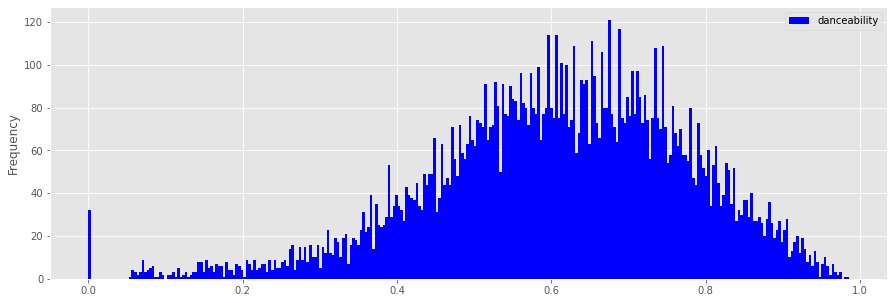

In [84]:
pop_ax = popularity_asc.plot(kind='hist',
                             x='popularity',
                             y='danceability', 
                             color='blue',figsize=(15,5),
                             bins=300)
pop_ax

In [85]:
pop_dance = popularity_asc[['artists','name','popularity','danceability']]
pop_dance

,artists,name,popularity,danceability
19787,['015B'],#tb 과거의 오늘 - Remastered,30,0.737
76417,['Armin van Buuren'],A State Of Trance (ASOT 997) - Outro,30,0.430
18309,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.542
17709,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.542
18329,['Armin van Buuren'],A State Of Trance (ASOT 994) - ASOT Tune Of Th...,30,0.597
...,...,...,...,...
19872,['The Kid LAROI'],WITHOUT YOU,94,0.662
19976,['KAROL G'],BICHOTA,95,0.863
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95,0.731
19866,['Ariana Grande'],positions,96,0.737


In [86]:
avg_dance = pop_dance.groupby('popularity').mean()
avg_dance

,danceability
popularity,
30,0.534609
31,0.604846
32,0.517128
33,0.508442
34,0.499643
...,...
92,0.779800
93,0.675500
94,0.789600


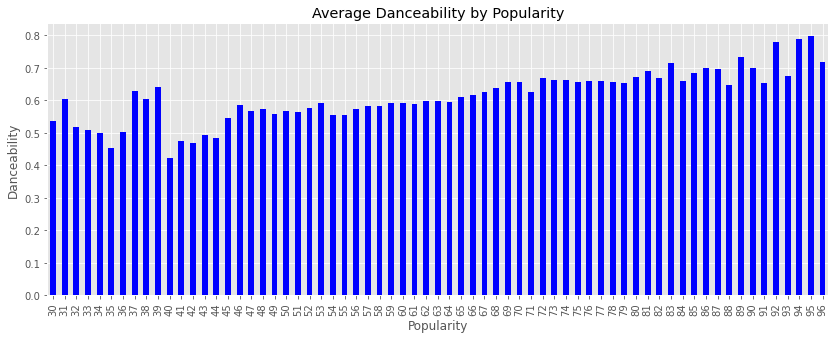

In [94]:
avg_dance.plot(kind='bar', 
               color='blue', 
               title='Average Danceability by Popularity', 
               xlabel='Popularity',
               ylabel='Danceability', 
               legend= None, 
               stacked=True,
               figsize=(14,5));

In [95]:
pop_energy = popularity_asc[['artists','name','popularity','energy']]
pop_energy

,artists,name,popularity,energy
19787,['015B'],#tb 과거의 오늘 - Remastered,30,0.441
76417,['Armin van Buuren'],A State Of Trance (ASOT 997) - Outro,30,0.957
18309,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.794
17709,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.794
18329,['Armin van Buuren'],A State Of Trance (ASOT 994) - ASOT Tune Of Th...,30,0.786
...,...,...,...,...
19872,['The Kid LAROI'],WITHOUT YOU,94,0.413
19976,['KAROL G'],BICHOTA,95,0.666
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95,0.573
19866,['Ariana Grande'],positions,96,0.802


In [96]:
avg_energy = pop_energy.groupby('popularity').mean()
avg_energy

,energy
popularity,
30,0.682145
31,0.605231
32,0.549774
33,0.636395
34,0.592286
...,...
92,0.516000
93,0.461000
94,0.510800


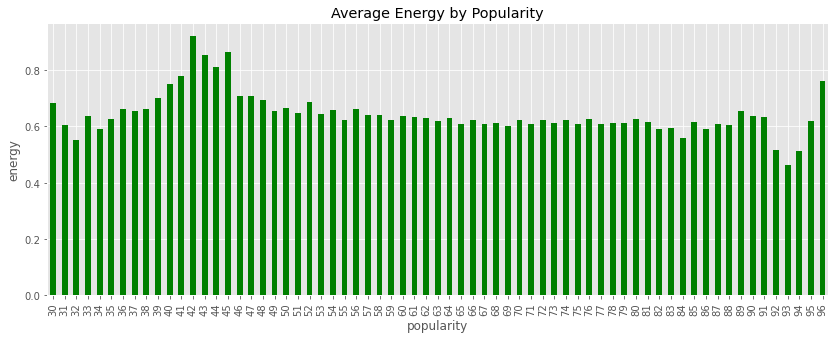

In [99]:
avg_energy.plot(kind='bar',
                title='Average Energy by Popularity', 
                xlabel='popularity',
                ylabel='energy',
                color='green',
                legend=None,
                figsize=(14,5));

In [101]:
pop_val = popularity_asc[['artists','name','popularity','valence']]
pop_val

,artists,name,popularity,valence
19787,['015B'],#tb 과거의 오늘 - Remastered,30,0.256
76417,['Armin van Buuren'],A State Of Trance (ASOT 997) - Outro,30,0.356
18309,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.810
17709,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.810
18329,['Armin van Buuren'],A State Of Trance (ASOT 994) - ASOT Tune Of Th...,30,0.599
...,...,...,...,...
19872,['The Kid LAROI'],WITHOUT YOU,94,0.467
19976,['KAROL G'],BICHOTA,95,0.838
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95,0.145
19866,['Ariana Grande'],positions,96,0.682


In [103]:
avg_valence = pop_val.groupby('popularity').mean()
avg_valence

,valence
popularity,
30,0.540354
31,0.545077
32,0.542549
33,0.453640
34,0.342157
...,...
92,0.469940
93,0.311450
94,0.559200


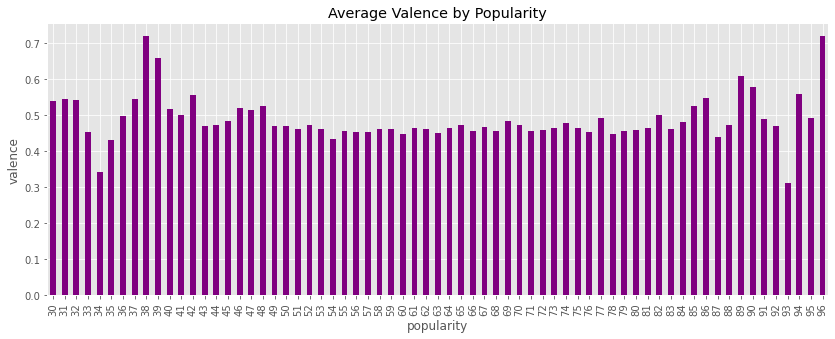

In [105]:
avg_valence.plot(kind='bar',
                title='Average Valence by Popularity', 
                xlabel='popularity',
                ylabel='valence',
                color='purple',
                legend=None,
                figsize=(14,5));

In [ ]:
pop_inst = popularity_asc[['artists','name','']]